# PCA and Image Classification on MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png'>

### Loading necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
np.set_printoptions(threshold=np.inf)

In [29]:
import sklearn
sklearn.__version__ #Version must be 0.24.1

'0.24.1'

In [31]:
#!pip install -U scikit-learn --user #to update sklearn

### Using sklearn "fetch_openml" to download Labels and Predictor of MNIST dataset

In [30]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [32]:
#Checking shape of downloaded data
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [33]:
#Checking the contents of X and Y
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X=X.to_numpy()

In [35]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [36]:
Y[0]

'5'

### Notice that we have 70000 images data in this dataset, but columns are 784. This dataset is being provided in flattened image format. The process of flattened image format has been shown below:

<img src='https://i1.wp.com/www.marktechpost.com/wp-content/uploads/2019/06/image-16.png?resize=653%2C299&ssl=1'>

In above figure, you can see that 3x3 vector or matrix (2D) is being converted to 1x9 vector or matrix (1D). Hence in MNIST data set we have 1D vector of all pixels for a particluar image. So, 28x28 pixels image creates a 1D vector of 784 values.

### Let's plot first 10 images with their labels using matplotlib.

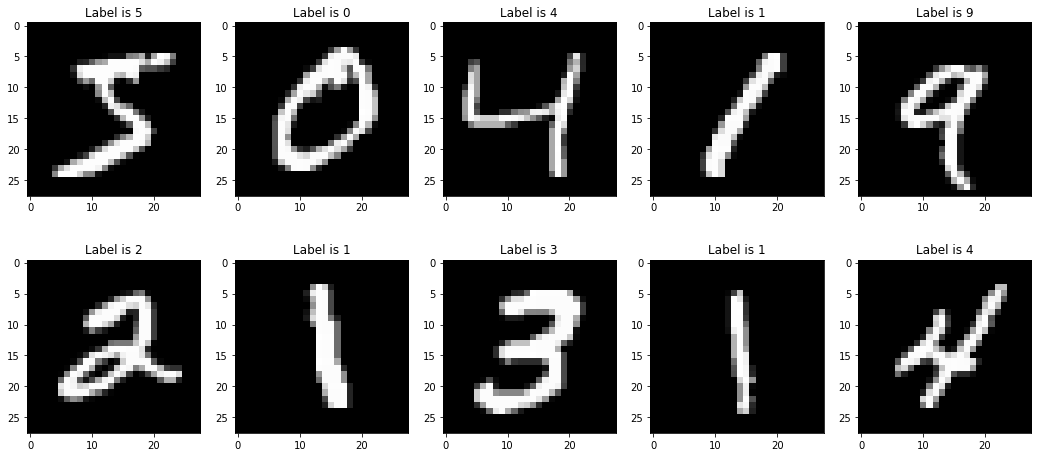

In [37]:
fig, axs = plt.subplots(2,5, figsize=(18, 8))
axs = axs.ravel()

for i in range(0,10):
    image = X[i]
    image = np.array(image, dtype='int')
    pixels = image.reshape((28, 28))
    axs[i].imshow(pixels, cmap='gray')
    axs[i].set_title('Label is '+str(Y[i]))

**Notice that 1D image has been reshaped to 2D image using numpy.**

### Let's visualize one of the image content and check to see how pixels are distributed within 28x28 images

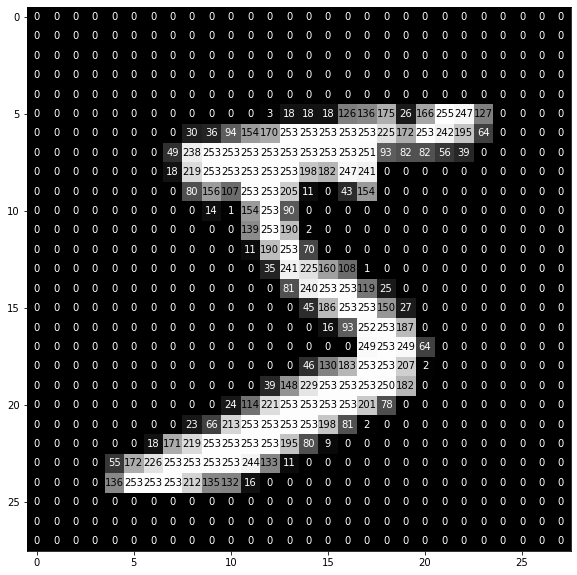

In [38]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

first_image = X[0]
first_image = np.array(first_image, dtype='int')
pixels = first_image.reshape((28, 28)) 
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(pixels, ax)

In [39]:
from sklearn.model_selection import train_test_split

#Perform Train Test split with test size 15% and random_state=42
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.15, random_state=42)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(59500, 784) (59500,)
(10500, 784) (10500,)


### Importing and Applying PCA

In [40]:
from sklearn.decomposition import PCA
#Make an instance of the Model
pca = PCA(.95,random_state=42)

**Notice the code above has .95 for the number of components parameter. It means that sklearn chose the minimum number of principal components such that 95% of the variance is retained.**

### Fit, transform, training and testing images using PCA model instance

In [41]:
pca.fit(xtrain)

train_img=pca.transform(xtrain)
test_img=pca.transform(xtest)

In [42]:
#Now checking principal components of training and testing images after applying PCA which are representing 95% variance of original images data
print(train_img.shape,ytrain.shape)
print(test_img.shape,ytest.shape)

(59500, 154) (59500,)
(10500, 154) (10500,)


In [43]:
from sklearn.linear_model import LogisticRegression
import timeit

In [44]:
#Now let's use Logistic regression to perform image classification
#Define instance of Logistic regression with solver as 'lbfgs', multi_class as 'multinomial', max_iter=300 and random state as 42
model = LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)

In [45]:
#Fit model on training images and training label
model.fit(train_img, ytrain)

C:\Users\Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=300, multi_class='multinomial', random_state=42)

In [46]:
#Get Prediction on testing images
pred = model.predict(test_img)

In [47]:
from sklearn.metrics import accuracy_score

#Calculate and print accuracy score for predictions
accuracy = accuracy_score(ytest, pred)
print(accuracy)

0.9132380952380953


In [48]:
from sklearn.metrics import classification_report

#Print classification report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1035
           1       0.92      0.97      0.95      1205
           2       0.91      0.89      0.90      1019
           3       0.90      0.89      0.89      1081
           4       0.90      0.92      0.91       968
           5       0.89      0.86      0.87       970
           6       0.92      0.95      0.94      1009
           7       0.92      0.94      0.93      1110
           8       0.91      0.83      0.87      1016
           9       0.90      0.91      0.90      1087

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



In [49]:
from sklearn.metrics import f1_score

#Calculate and print weighted average of F1 score
f1 = f1_score(ytest, pred, average='weighted')
print(f1)

0.9128033694838119


**Note: We can see that both Accuracy and F1 Score are around 91.3% and it is a really good score for 154 components instead of all 784 pixels**

### Now let's do comparison of Model performance against difference Maximal Variance and Components

In [50]:
#defining list of Variance
pca_var=[1.0,.99,.95,.90,.85,.80,.75]

#defining empty lists
accuracy_list=[]
f1_list=[]
pca_components=[]
training_time=[]
prediction_time=[]

In [51]:
for v in pca_var:
    
    #applying PCA
    if v==1.0:
        train_img=xtrain
        test_img=xtest
        
    else:
        pca = PCA(v,random_state=42)
        pca.fit(xtrain)
        train_img=pca.transform(xtrain)
        test_img=pca.transform(xtest)
    
    #model
    model=LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)
    
    #training
    t_start = timeit.default_timer()
    model.fit(train_img,ytrain)
    t_stop = timeit.default_timer()
    
    #prediction
    p_start = timeit.default_timer()
    pred=model.predict(test_img)
    p_stop = timeit.default_timer()
    
    #Append data in lists
    accuracy_list.append(np.round(accuracy_score(ytest,pred),4))
    f1_list.append(np.round(f1_score(ytest,pred, average='weighted'),4))
    pca_components.append(train_img.shape[1])
    training_time.append(np.round(t_stop-t_start,0))
    prediction_time.append(np.round(p_stop-p_start,0))

C:\Users\Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### Creating comparison data frame

In [52]:
comparison_dict={'Variance Retained':pca_var,'Number of Components':pca_components,
               'Training Time':training_time,'Prediction Time':prediction_time,
               'Accuracy Score':accuracy_list,'F1 Score':f1_list}
comparison=pd.DataFrame(comparison_dict)
comparison

,Variance Retained,Number of Components,Training Time,Prediction Time,Accuracy Score,F1 Score
0,1.00,784,76.0,0.0,0.9193,0.9192
1,0.99,331,46.0,0.0,0.9167,0.9163
2,0.95,154,34.0,0.0,0.9132,0.9128
3,0.90,87,30.0,0.0,0.9156,0.9153
4,0.85,59,28.0,0.0,0.9117,0.9114
5,0.80,43,27.0,0.0,0.9035,0.9032
6,0.75,33,27.0,0.0,0.8975,0.8971


So we can see that Model performance is not much degraded until 87 components compared to all 784 components. Hence we can use 90% Variance using PCA to perform image classification in this dataset.

## Exporting PCA and Model for deployment

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

<img src='https://miro.medium.com/max/466/1*Menz4NWvM6Ca8H6B0d6VrQ.png' width="200" height="400">

In [53]:
import pickle as pk

In [54]:
#Exporting pickle file for PCA at 90% Explained Variance to be used while transforming data in Model Deployment
pca = PCA(.90,random_state=42)
pca.fit(X)
train_img=pca.transform(X)
pk.dump(pca, open("pca.pkl","wb"))

In [55]:
#Exporting pickle file for Trained Model to be used for taking prediction of future images after Model Deployment
model=LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)
model.fit(train_img,Y)
pk.dump(model, open("model.pkl","wb"))

C:\Users\Fahad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Visualizing PCA Components and Image Compression

In [56]:
#if n_components is not set all components are kept (784 in this case)
#Define empty PCA instance with random state 42
pca = PCA(random_state=42)

In [57]:
#Fit PCA on X (without scaled)
pca.fit(xtrain)

PCA(random_state=42)

In [58]:
#Check number of components using .n_components_ attribute
pca.n_components_

784

In [59]:
#Calculating total variance
tot = sum(pca.explained_variance_)
tot

3432134.994946134

In [60]:
#Calculating Percentage of Explained Variance against each component
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.739722277940908, 7.159276100793063, 6.159392155026183, 5.41024982968509, 4.8922725007812575]


In [61]:
#Calculating Cummulative Explained Variance
cum_var_exp = np.cumsum(var_exp)
cum_var_exp[0:5]

array([ 9.73972228, 16.89899838, 23.05839053, 28.46864036, 33.36091286])

### Note: Plot can help understand the level of redundancy/information present in multiple dimensions.

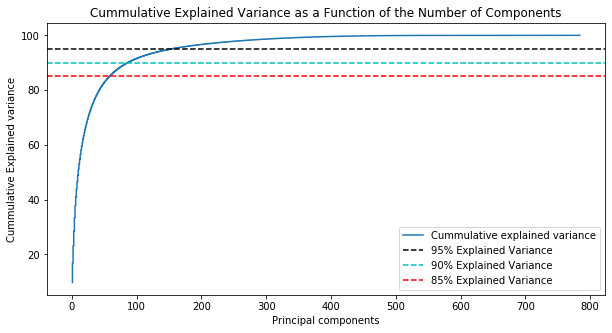

In [67]:
# Plotting out the explained variances superimposed 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp,label='Cummulative explained variance')
plt.title('Cummulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cummulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

### Plotting Image Compression against 100%, 99%, 95%, 90%, and 85% of Explained Variance

In [63]:
def explainedVariance(percentage, images): 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

In [64]:
pca_var=[1.0,.99,.95,.90,.85]

In [65]:
components = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, 
              np.argmax(cum_var_exp >= 85) + 1]
components

[784, 331, 154, 87, 59]

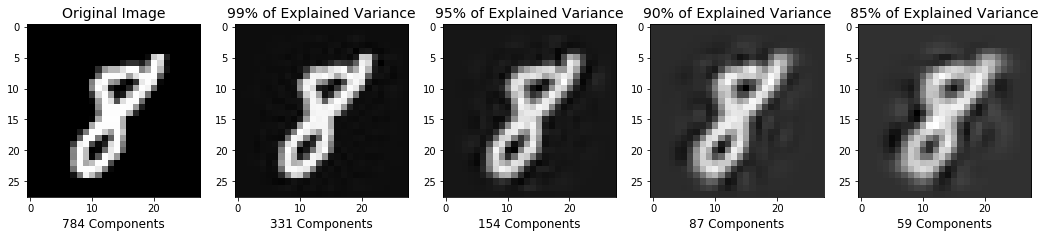

In [66]:
fig, axs = plt.subplots(1,5, figsize=(18, 8))
axs = axs.ravel()

for i,perc in enumerate(pca_var):
    if perc==1.0:
        axs[i].imshow(X[17].reshape(28,28),cmap='gray');
        axs[i].set_xlabel(str(components[i])+' Components', fontsize = 12)
        axs[i].set_title('Original Image', fontsize = 14)
    else:
        axs[i].imshow(explainedVariance(perc,X)[17].reshape(28,28),cmap='gray');
        axs[i].set_xlabel(str(components[i])+' Components', fontsize = 12)
        axs[i].set_title(str(int(perc*100))+'% of Explained Variance', fontsize = 14)
  